# Bioinformatics: Coding Assignment 2

Animesh Sinha (2018113001)

In [1]:
import os
import math
import collections
import itertools
import re

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pf

plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
PROJECT_DIR = '/content/gdrive/My Drive/Scratch Space/bio'

Questions:

1. Write a program to change format of a DNA sequence: from Fasta format to Flat file format and vice versa. (File: take any gene sequence)	    

2. Write a script to parse the features table from a GenBank file. (File: FJ959345; NM_175762)		 					

3. It is assumed that A = T and G = C in a genome. Compute G+C content, (G+C)/(A+T+G+C), deviation from A = T, (A-T)/(A+T) and deviation from G = C, (G-C)/(G+C) to confirm. Use a non-overlapping sliding window of size 50Kb. [Hint use some bacterial genome]

4. Write a program to find ‘most frequent’ 9-mers in Vibrio Cholerae genome (Chr1: NC_002505.1, Chr2: NC_002506.1): (i) exact match, (ii) allowing ‘d’ mismatches. [Hint: count for reverse complements also).	Are the ‘most frequent’ 9-mers the same in Salmonella enterica (NC_003198.1) as identified in Vibrio Cholerae genome? Plot the GC skew and find which ‘most frequent’ 9-mer is in the vicinity of the region where GC skew changes sign.

5. Using the k-mer detection program in Q-4 above, carry out comparison of the SARS-CoV-2 genome with bat coronavirus genome using k=6 (exact matches). (i) Based on your analysis can you infer that SARS-CoV-2 coronavirus is related to bat coronavirus? (ii) Based on the GC content of SARS-CoV-2 genome, what can you say about the stability of this virus at high temperatures.

# Question 1


In [4]:
!pip install biopython

     |████████████████████████████████| 2.3MB 2.8MB/s 


The following 2 solutions are manual parsing, they may not extend to all files correctly but suffice to parse most of the files.

In [5]:
def flat_to_fasta(input):
    definition, accession, sequence = None, None, None
    for line in input.readlines():
        if line.startswith('DEFINITION'):
            definition = " ".join(line.split(" ")[1:]).strip()
        elif line.startswith("ACCESSION"):
            accession = " ".join(line.split(" ")[1:]).strip()
        elif line.startswith("ORIGIN"):
            sequence = ""
        elif line.startswith(" ") and sequence is not None:
            break
        elif sequence is not None:
            string += line.strip().upper()
    return '>' + definition + ' ' + accession + '\n' + (sequence if sequence is not None else '')

with open('temp.fasta', 'w') as f:
    f.write(flat_to_fasta(open(os.path.join(PROJECT_DIR, 'streptococcus.gb'), 'r')))

!head -10 temp.fasta

>Streptococcus suis SC84, complete genome. NC_012924


In [6]:
def fasta_to_flat(input):
    definition, sequence = None, ""
    for idx, line in enumerate(input.readlines()):
        if line.startswith('>'):
            definition = line[1:].strip()
        else:
            sequence += line.strip()

    header = "{:12s}{}\n{:12s}{}\n{:12s}{}\n{:12s}{}\n{:12s}{}\n{:12s}{}\n{:12s}{}\n{:12s}{}\n{:21s}{}\n{:s}\n".format(
        "LOCUS", definition.split(" ")[0],
        "DEFINITION", definition,
        "ACCESSION",definition.split(" ")[0].split(".")[0],
        "VERSION", definition.split(" ")[0],
        "KEYWORDS", ".",
        "SOURCE", ".",
        "  ORGANISM", ".",
        "", ".",
        "FEATURES", "Location/Qualifiers",
        "ORIGIN",
    )
    genome = '\n'.join([
             '{:>9} {} {} {} {} {} {}'.format(i + 1, *[sequence[j : min(j + 10, len(sequence))] for j in range(i, min(i + 60, len(sequence)), 10)])
         for i in range(0, len(sequence) - 60, 60)])

    return header + genome + '\n'

with open('temp.gb', 'w') as f:
    f.write(fasta_to_flat(open(os.path.join(PROJECT_DIR, 'streptococcus.fasta'), 'r')))

!head -20 temp.gb

LOCUS       NC_012924.1
DEFINITION  NC_012924.1 Streptococcus suis SC84, complete genome
ACCESSION   NC_012924
VERSION     NC_012924.1
KEYWORDS    .
SOURCE      .
  ORGANISM  .
            .
FEATURES             Location/Qualifiers
ORIGIN
        1 ATGAACCAAG AACAACTTTT TTGGCAACGA TTTATTGAAT TGGCAAAGGT AAATTTTAAG
       61 CCATCTATTT ATGATTTTTA TGTCGCTGAT GCAAAATTAC TCGGAATCAA CCAGCAAGTT
      121 GCCAATATTT TCTTAAATCG TCCATTTAAA AAAGATTTCT GGGAAAAAAA CTTCGAAGAG
      181 TTAATGATTG CCGCTAGTTT TGAAAGCTAC GGAGAGCCTC TTACCATCCA ATATCAATTT
      241 ACAGAGGATG AACAGGAGAT TAGGAATACT ACAAACACAA GAAGTTCAAT AGTTCACCAG
      301 GTACAGACAC TTGAGCCGGC TACTCCTCAA GAAACTTTTA AACCGGTTCA TTCTGATATA
      361 AAATCCCAGT ACACCTTTGC TAATTTTGTA CAAGGAGACA ATAATCACTG GGCAAAGGCT
      421 GCAGCTTTAG CTGTATCTGA TAACCTAGGT GAGCTCTACA ATCCATTATT CATTTTTGGT
      481 GGTCCTGGTC TTGGAAAAAC TCATATTTTA AATGCGATTG GAAATAAGGT TCTAGCCGAT
      541 AATCCCCAGG CAAGGATAAA ATATGTCTCA TCGGAAACAT TCATCAATGA ATTTTTAGAA


The following 2 solutions use the BioPython library to parse, they are more complete solutions.

This code works thanks to https://github.com/biopython/biopython/issues/3259.

In [7]:
from Bio import SeqIO

input_file = input('Input Filename: ')
output_file = input('Output Filename: ')
SeqIO.convert(os.path.join(PROJECT_DIR, input_file + '.gb'), 'genbank', output_file + '.fasta', 'fasta', 'DNA')
print(''.join(list(open(output_file + '.fasta', 'r').readlines())[:20]))

Input Filename: streptococcus
Output Filename: temp
>NC_012924.1 Streptococcus suis SC84, complete genome
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN

In [8]:
input_file = input('Input Filename: ')
output_file = input('Output Filename: ')
SeqIO.convert(os.path.join(PROJECT_DIR, input_file + '.fasta'), 'fasta', output_file + '.gb', 'genbank', 'DNA')
print(''.join(list(open(output_file + '.gb', 'r').readlines())[:20]))

Input Filename: streptococcus
Output Filename: temp
LOCUS       NC_012924.1          2095898 bp    DNA              UNK 01-JAN-1980
DEFINITION  NC_012924.1 Streptococcus suis SC84, complete genome.
ACCESSION   NC_012924
VERSION     NC_012924.1
KEYWORDS    .
SOURCE      .
  ORGANISM  .
            .
FEATURES             Location/Qualifiers
ORIGIN
        1 atgaaccaag aacaactttt ttggcaacga tttattgaat tggcaaaggt aaattttaag
       61 ccatctattt atgattttta tgtcgctgat gcaaaattac tcggaatcaa ccagcaagtt
      121 gccaatattt tcttaaatcg tccatttaaa aaagatttct gggaaaaaaa cttcgaagag
      181 ttaatgattg ccgctagttt tgaaagctac ggagagcctc ttaccatcca atatcaattt
      241 acagaggatg aacaggagat taggaatact acaaacacaa gaagttcaat agttcaccag
      301 gtacagacac ttgagccggc tactcctcaa gaaactttta aaccggttca ttctgatata
      361 aaatcccagt acacctttgc taattttgta caaggagaca ataatcactg ggcaaaggct
      421 gcagctttag ctgtatctga taacctaggt gagctctaca atccattatt catttttggt
      481 ggtcctggtc ttggaaaaac tcatatttta a

# Question 2

In [9]:
input_file = 'streptococcus' # input('Input Filename: ')
output_dict = {}

with open(os.path.join(PROJECT_DIR, input_file + '.gb'), 'r') as f:
    remove_quotes = lambda string: string[1:-1] if string[0] == '"' else string
    running, running_label, last_el = False, None, None
    for line in f.readlines():
        if (not running and line.startswith('FEATURES')) or (running and not line.startswith(' ')):
            running, running_label = not running, None
        elif running and line.strip().startswith('/'):
            output_dict[running_label][line.strip().split('=')[0][1:]] = remove_quotes(line.strip().split('=')[1])
        elif running:
            running_label = line.strip().split(' ')[0]
            output_dict[running_label] = {}

print(output_dict)

{'source': {'organism': 'Streptococcus suis SC84', 'mol_type': 'genomic DNA', 'strain': 'SC84', 'isolation_source': 'human case of meningitis', 'db_xref': 'taxon:568813', 'country': 'China:Sichuan Province', 'collection_date': '2005'}}


# Question 3

In [10]:
with open(os.path.join(PROJECT_DIR, 'streptococcus.fasta'), 'r') as f:
    genome = "".join(list(f.readlines()[1:])).replace('\n', '')

c_a, c_t, c_g, c_c = [], [], [], []
WINDOW_SIZE = 50000
for i in range(0, len(genome), WINDOW_SIZE):
    window = genome[i:min(i + WINDOW_SIZE, len(genome))]
    c_a.append(window.count('A'))
    c_t.append(window.count('T'))
    c_g.append(window.count('G'))
    c_c.append(window.count('C'))

c_a, c_t, c_g, c_c = np.array(c_a), np.array(c_t), np.array(c_g), np.array(c_c)

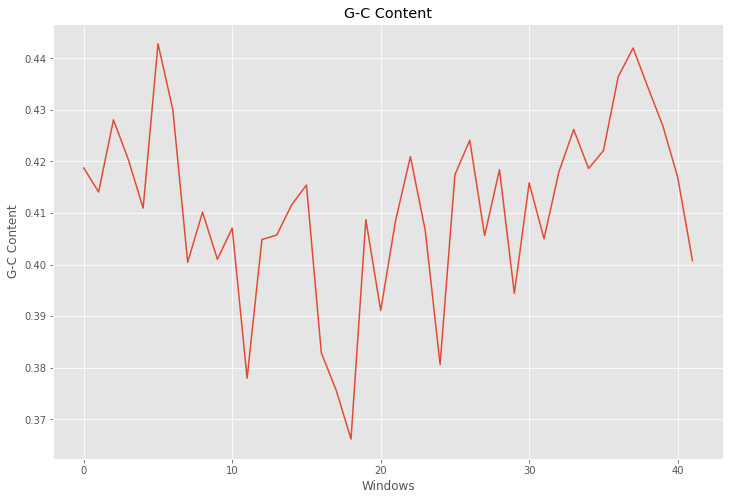

In [11]:
plt.figure(figsize=(12, 8))
plt.plot((c_g + c_c) / (c_a + c_t + c_g + c_c))
plt.xlabel('Windows')
plt.ylabel('G-C Content')
plt.title('G-C Content')
plt.show()

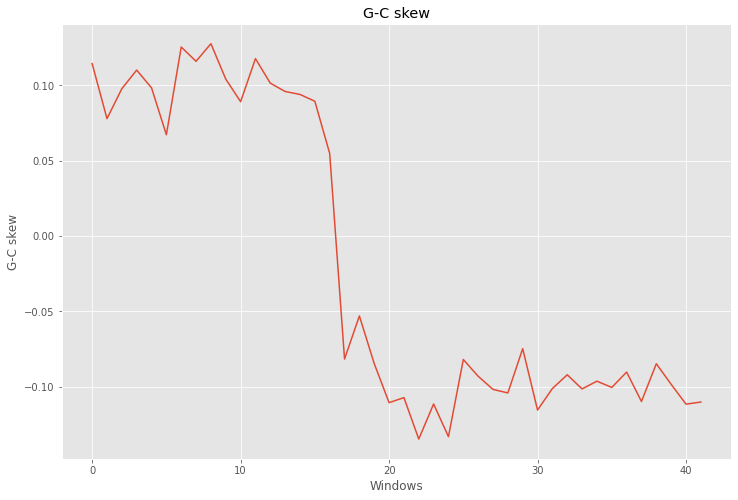

In [12]:
plt.figure(figsize=(12, 8))
plt.plot((c_g - c_c) / (c_g + c_c))
plt.xlabel('Windows')
plt.ylabel('G-C skew')
plt.title('G-C skew')
plt.show()

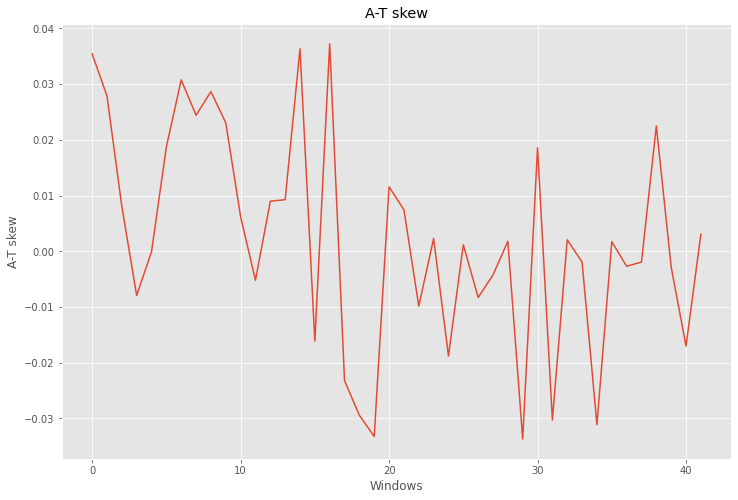

In [13]:
plt.figure(figsize=(12, 8))
plt.plot((c_a - c_t) / (c_a + c_t))
plt.xlabel('Windows')
plt.ylabel('A-T skew')
plt.title('A-T skew')
plt.show()

# Question 4

In [14]:
FILES = ["vibrio_cholerae_1.fasta", "vibrio_cholerae_2.fasta", "salmonella_enterica.fasta"]

In [15]:
def get_genome(filename):
    with open(os.path.join(PROJECT_DIR, filename), 'r') as f:
        ans = "".join(list(f.readlines())[1:]).replace('\n', '')
    return ans

In [16]:
def get_neighbor_strings(string, k):
    neighbors = set([string])
    for comb in itertools.combinations(range(len(string)), k):
        for vals in itertools.product("ATGC", repeat=k):
            copy = list(string)
            for i, val in zip(comb, vals):
                copy[i] = val
            neighbors.add(''.join(copy))
    return neighbors

In [17]:
def reverse_complement(genome):
    return genome.replace('A', 't').replace('T', 'a').replace('G', 'c').replace('C', 'g').replace('Y', 'r').replace('R', 'y').replace('K', 'm').replace('M', 'k').upper()[::-1]

In [18]:
def match(genome, d = None, k = 9):
    freq = collections.defaultdict(lambda: 0)
    for i in range(len(genome) - k):
        if d is None:
            freq[genome[i : i + k]] += 1
        else:
            for seq in get_neighbor_strings(genome[i : i + k], d):
                freq[seq] += 1
    return freq

def merge(dict1, dict2):
    for item in dict2:
        dict1[item] += dict2[item]
    return dict1

In [19]:
m1 = merge(match(get_genome(FILES[0])), match(reverse_complement(get_genome(FILES[0]))))
m2 = merge(match(get_genome(FILES[1])), match(reverse_complement(get_genome(FILES[1]))))
x = merge(m1, m2)
y = merge(match(get_genome(FILES[2])), match(reverse_complement(get_genome(FILES[2]))))

import heapq
print('Vibrio Cholerae:', heapq.nlargest(3, x))
print('Salmonella enterica:', heapq.nlargest(3, y))

Vibrio Cholerae: ['YYYCTCCTA', 'YYCTCCTAT', 'YTGTTTAAA']
Salmonella enterica: ['TTTTTTTTT', 'TTTTTTTTG', 'TTTTTTTTC']


Salmonella Enterica does not seem to have the same Sequences most present in it's genome as in Vibrio Cholerae, even upto the possible substitutions of the Pyrimidine Base.

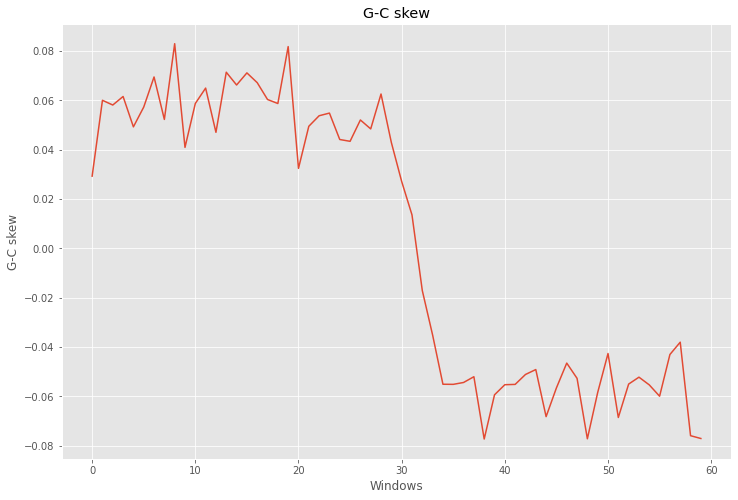

In [20]:
genome = get_genome(FILES[0])

c_a, c_t, c_g, c_c = [], [], [], []
WINDOW_SIZE = 50000

for i in range(0, len(genome), WINDOW_SIZE):
    window = genome[i:min(i + WINDOW_SIZE, len(genome))]
    c_a.append(window.count('A'))
    c_t.append(window.count('T'))
    c_g.append(window.count('G'))
    c_c.append(window.count('C'))

c_a, c_t, c_g, c_c = np.array(c_a), np.array(c_t), np.array(c_g), np.array(c_c)

plt.figure(figsize=(12, 8))
plt.plot((c_g - c_c) / (c_g + c_c))
plt.xlabel('Windows')
plt.ylabel('G-C skew')
plt.title('G-C skew')
plt.show()

In [21]:
genome = get_genome(FILES[0])[30*50000:35*50000]
y = merge(match(genome), match(reverse_complement(genome)))
print('Vibrio Cholerae:', heapq.nlargest(3, x))

Vibrio Cholerae: ['YYYCTCCTA', 'YYCTCCTAT', 'YTGTTTAAA']


We note that the most common genes on the entire genome are also the once on the place where the G-C skew changes sign, indicating that we have found Origin of Replication.

# Question 5

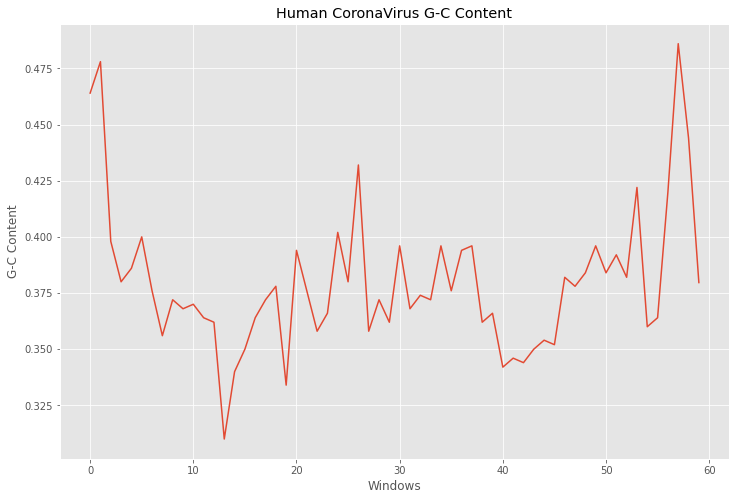

In [22]:
with open(os.path.join(PROJECT_DIR, 'human_coronavirus.fasta'), 'r') as f:
    genome = "".join(list(f.readlines()[1:])).replace('\n', '')

c_a, c_t, c_g, c_c = [], [], [], []
WINDOW_SIZE = 500
for i in range(0, len(genome), WINDOW_SIZE):
    window = genome[i:min(i + WINDOW_SIZE, len(genome))]
    c_a.append(window.count('A'))
    c_t.append(window.count('T'))
    c_g.append(window.count('G'))
    c_c.append(window.count('C'))

c_a, c_t, c_g, c_c = np.array(c_a), np.array(c_t), np.array(c_g), np.array(c_c)

plt.figure(figsize=(12, 8))
plt.plot((c_g + c_c) / (c_a + c_t + c_g + c_c))
plt.xlabel('Windows')
plt.ylabel('G-C Content')
plt.title('Human CoronaVirus G-C Content')
plt.show()

**The GC content of the virus is low so it's unlikely to be stable under high temperature**. (Lower than 50% throughout)

In [23]:
m1 = merge(match(get_genome('human_coronavirus.fasta'), k=6), match(reverse_complement(get_genome('human_coronavirus.fasta')), k=6))
m2 = merge(match(get_genome('bat_coronavirus.fasta'), k=6), match(reverse_complement(get_genome('bat_coronavirus.fasta')), k=6))

def intersect(dict1, dict2):
    counter = 0
    for item in dict1:
        counter += min(dict1[item], dict2[item])
    return counter

def count(dict1):
    counter = 0
    for item in dict1:
        counter += dict1[item]
    return counter

print(intersect(m1, m2), 'sequences are common out of', count(m1), 'and', count(m2), 'genomes')

48872 sequences are common out of 59794 and 60952 genomes


This shows a very high similarity and points to a common origin.